# This file is used for output the simulated data for Patient 2
By selecting pid, stimulation and monitor, you can output time series for both SEEG and TI stimulation, as well as for both SEEG and EEG measurement.

In [2]:
import vep_prepare_sim

In [3]:
roi = vep_prepare_sim.read_vep_mrtrix_lut()

In [4]:
import matplotlib.pylab as plt
import numpy as np

In [5]:
import glob

In [6]:
pid = 'Patient2'
stimulation = 'TI'
ipid = 'P2'
monitor = 'SEEG'
if stimulation == 'TI':
     file_basic = f'{pid}_TI_EEG_fit.npz'
else:
    file_basic = f'{pid}_SEEG_ts_fit.npz'
    
file_basic = f'{ipid}_TI_EEG_fit.npz'
basic_data_dir = f'/data/dataSim/{pid}/'
sensor_data_file = f'{basic_data_dir}/{file_basic}'

sensor_data = np.load(sensor_data_file)


In [7]:
sensor_data.files

['time_steps', 'eeg', 'SC', 'gain']

In [8]:
seeg = sensor_data['eeg']

In [9]:
time = sensor_data['time_steps']

In [10]:
nchan = np.shape(seeg)[0]

In [11]:
ch_names = [f"E{inde}" for inde in np.arange(nchan)]

#ch_names = sensor_data['ch_names'].tolist()

show_ch = ["E17","E18","E21","E22","E30","E31","E60","E68","E120","E127"]

nch = [ch_names.index(ichan) for ichan in show_ch]

In [12]:
import numpy

Nsamp = 0.02
seeg_noise = seeg + numpy.random.normal(0, Nsamp, size=len(seeg.T))

In [13]:
np.shape(time)

(900,)

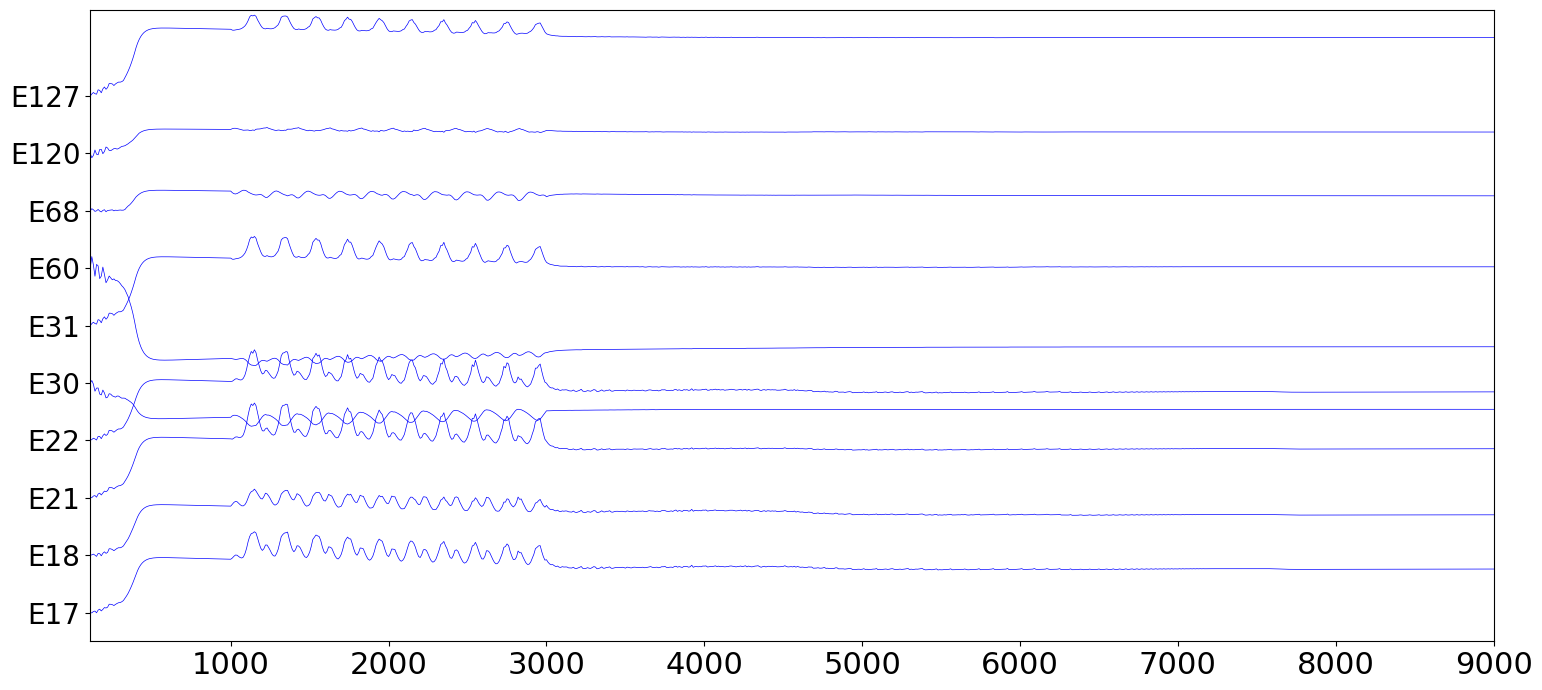

In [14]:
plt.figure(figsize=[15,7])
scaleplt = 0.00002


start_idx = 10; #int(seeg_info['onset'] * seeg_info['sfreq']) - int((ts_on-ts_cut) * seeg_info['sfreq'])
end_idx = 1100
#end_idx = 9000; # int(seeg_info['offset'] * seeg_info['sfreq']) + int(ts_off * seeg_info['sfreq'])
y = seeg_noise.T[start_idx:end_idx].T
t = time[start_idx:end_idx]
slp = y
#baseline = np.min(np.mean(slp[:,nch],axis=0))
#baseline = slp[:,0]
for ind, ich in enumerate(nch):
    
    plt.plot(t, scaleplt*(y[ich]-y[ich,0]) + ind, 'blue', lw=0.5);
    '''
    if ind < 1:
        plt.plot(t, scaleslp*(slp[:,ich]-baseline)+ ind, 'red',lw=1);
    else:
        plt.plot(t, scaleslp*(slp[:,ich]-baseline) - 1+ ind, 'red',lw=1);
    '''

plt.xticks(fontsize=22)
plt.ylim([-0.5,len(nch)+0.5])
plt.xlim([t[0],t[-1]])
plt.tight_layout()
#plt.title(f'{pid}:ts_{szr_name}')
plt.yticks(np.arange(len(show_ch)),show_ch, fontsize=20);

In [15]:
np.shape(seeg_noise)

(128, 900)

In [16]:
from scipy import signal
import matplotlib.pyplot as plt

if stimulation == 'TI':
    IND_ON = 200
    IND_OFF = 800
else:
    IND_ON = 350
    IND_OFF = 800

seeg_4feature = seeg[:,IND_ON:IND_OFF]

#raw_eeg = seeg_4feature
sos = signal.butter(4, 2., 'hp', fs=10., output='sos')
filtered = signal.sosfilt(sos, seeg_4feature)

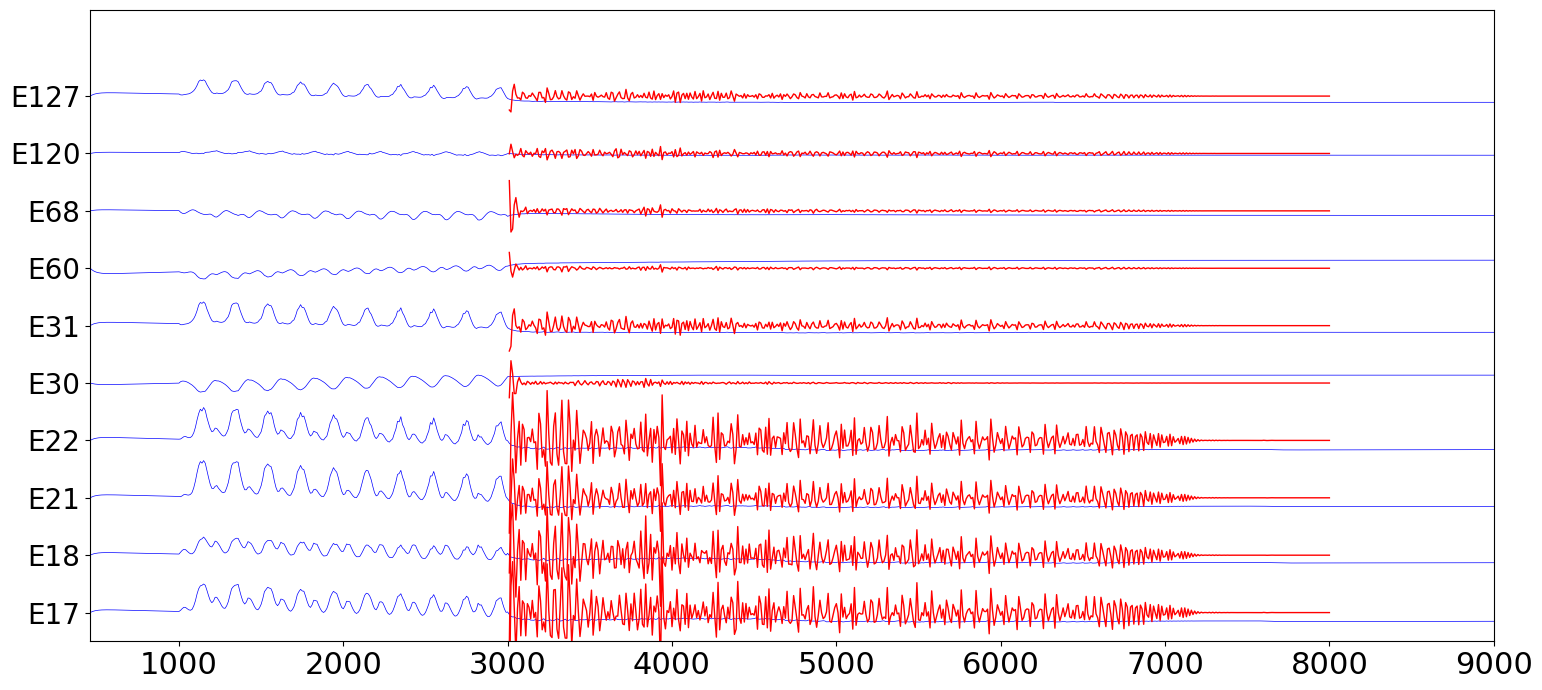

In [17]:
plt.figure(figsize=[15,7])
scaleplt_filted = 0.001
scaleplt = 0.00002

if stimulation == 'TI':
    start_idx = 45; #int(seeg_info['onset'] * seeg_info['sfreq']) - int((ts_on-ts_cut) * seeg_info['sfreq'])
    end_idx = 1000; # int(seeg_info['offset'] * seeg_info['sfreq']) + int(ts_off * seeg_info['sfreq'])
else: 
    start_idx = 10; #int(seeg_info['onset'] * seeg_info['sfreq']) - int((ts_on-ts_cut) * seeg_info['sfreq'])
    end_idx = 1110
y = seeg_noise.T[start_idx:end_idx].T
t = time[start_idx:end_idx]

#start_idx = ; #int(seeg_info['onset'] * seeg_info['sfreq']) - int((ts_on-ts_cut) * seeg_info['sfreq'])
#end_idx = 500; # int(seeg_info['offset'] * seeg_info['sfreq']) + int(ts_off * seeg_info['sfreq'])
if stimulation == 'TI':
    start_idx_y = 100    
else:
    start_idx_y = 90

y_filted = filtered.T[start_idx_y:].T 
#t_filted = (np.arange(np.shape(y_filted)[1])+ IND_ON+start_idx_y)*10
t_filted =  time[IND_ON+start_idx_y:IND_OFF]
#baseline = np.min(np.mean(slp[:,nch],axis=0))
#baseline = slp[:,0]
for ind, ich in enumerate(nch):
    plt.plot(t, scaleplt*(y[ich]-y[ich,0]) + ind, 'blue', lw=0.5);

    plt.plot(t_filted, scaleplt_filted*(y_filted[ich]-y_filted[ich,-1]) + ind, 'red', lw=1);
    '''
    if ind < 1:
        plt.plot(t, scaleslp*(slp[:,ich]-baseline)+ ind, 'red',lw=1);
    else:
        plt.plot(t, scaleslp*(slp[:,ich]-baseline) - 1+ ind, 'red',lw=1);
    '''

plt.xticks(fontsize=22)
plt.ylim([-0.5,len(nch)+0.5])
plt.xlim([t[0],t[-1]])
plt.tight_layout()
#plt.title(f'{pid}:ts_{szr_name}')
plt.yticks(np.arange(len(show_ch)),show_ch, fontsize=20);